## Setup
Before we import our data, lets import some common packages for data processing, visualisation, model training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Data
Now, we'll load the downloaded and stored our in the current directory using pandas and store in variable for further processing.

In [2]:
slump = pd.read_csv('slump_test.data')

## Take a quick look of the data
Notice for any deviation from the dataset's description, null values, invalid values etc.

There are 103 observations in the dataset with 11 features which does not much match with the data description. The "No" column was not mentioned in the description given thus it seems it's just the indexes of data points thus this should be dropped later.

All the features are numerical and the data is very clean with no null values.

In [3]:
slump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
slump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [5]:
slump.describe()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


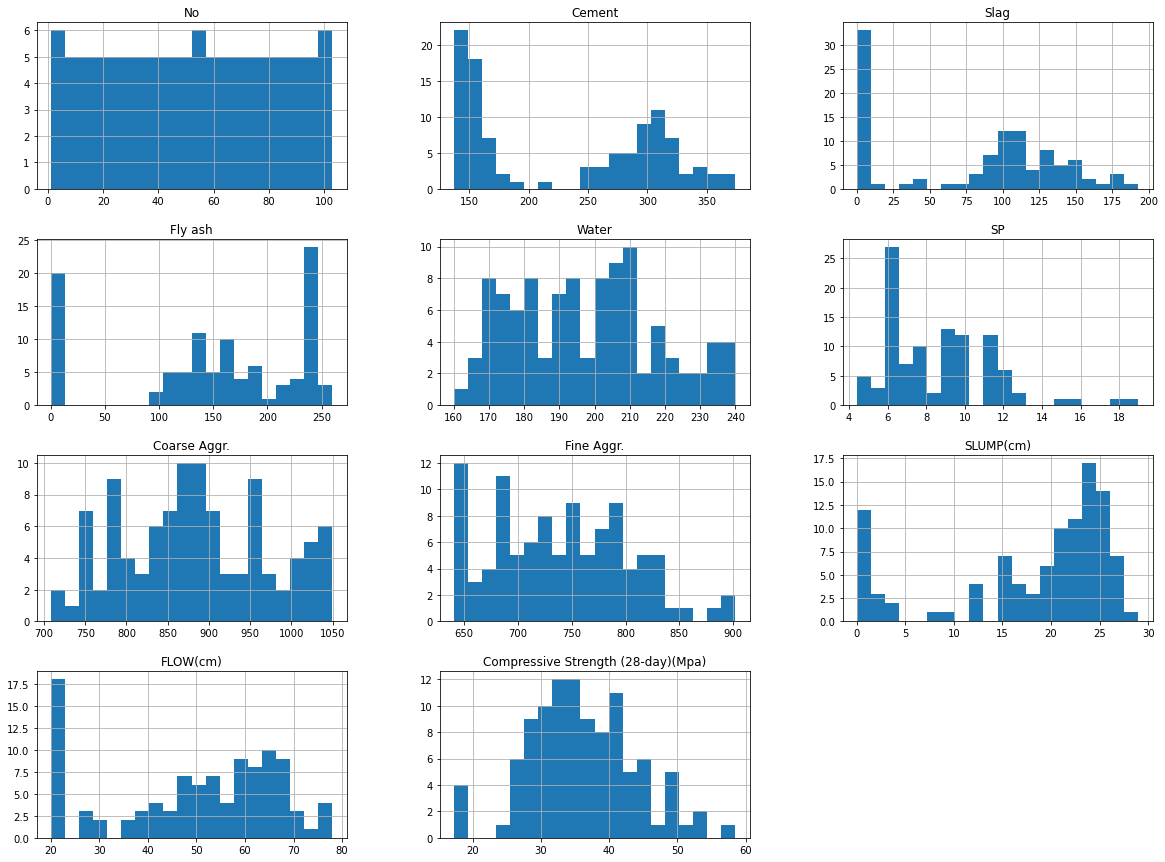

In [6]:
slump.hist(bins=20, figsize=(20,15))
plt.show()

## Split the data
80/20 random split of the data

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(slump, test_size=0.20, random_state=42)

## Visualisation 
Since the dataset has only numerical variabels, scatterplot with smooth curve should be enough to visualise the relationship between the target variable and other features.

From the below 2 graphs- looking at the smooth curve, we can see that 'SP' has no/very weak relationship between 'Compressive Strength'. And 'Fine Aggr' and 'Coarse Arg' have weak correlation between the target variable. While others have a stronger negative/positive relationship between 'Compressive Strength'.

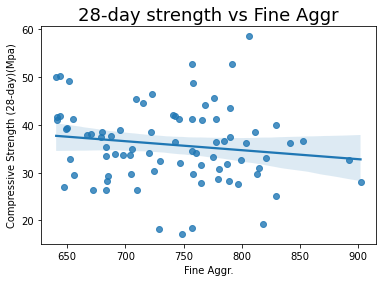

In [8]:
sns.regplot(x="Fine Aggr.", y='Compressive Strength (28-day)(Mpa)', data=train)
plt.title("28-day strength vs Fine Aggr",fontsize=18)
plt.show()

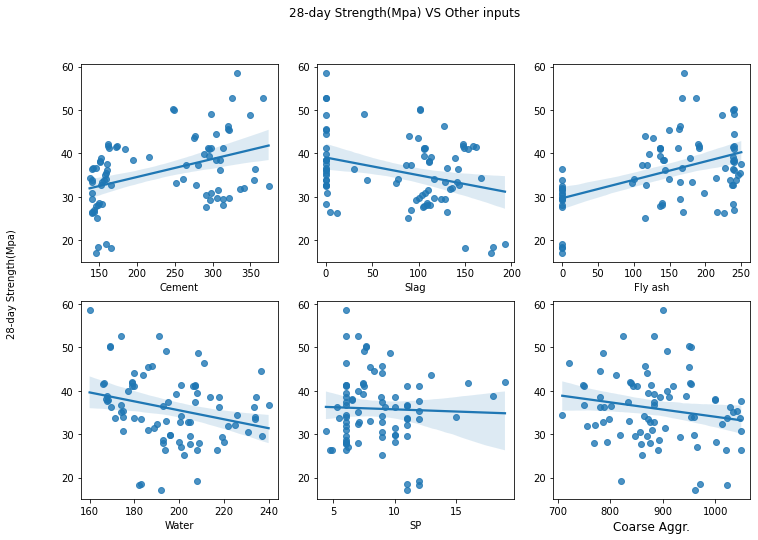

In [9]:
# scattersplot for other 6 input variables vs compressive strength
#plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

def scatter(x, column, col, row, data=train, y='Compressive Strength (28-day)(Mpa)'):
    g = sns.regplot(x=x, y=y, data=data,ax=axs[row,col])
    g.set(ylabel=None)
    plt.xlabel(train.columns[column], fontsize=12)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize= (12,8))
scatter(x="Cement",       column=1, col=0, row = 0)
scatter(x="Slag",         column=2, col=1, row = 0)
scatter(x="Fly ash",      column=3, col=2, row = 0)
scatter(x="Water",        column=4, col=0, row = 1)
scatter(x="SP",           column=5, col=1, row = 1)
scatter(x="Coarse Aggr.", column=6, col=2, row = 1)

fig.suptitle('28-day Strength(Mpa) VS Other inputs')
fig.text(0.04, 0.5, '28-day Strength(Mpa)', va='center', rotation='vertical')

plt.show()

Let's confirm the finding above by obtain the correaltion between varabile. Since it's a small dataset, we could just call the corr function to get the correaltion score between variables.

Looking at the last column, we can see correlation between SP and Compressive Strength is only -0.037, so we could drop this column when we train our models.

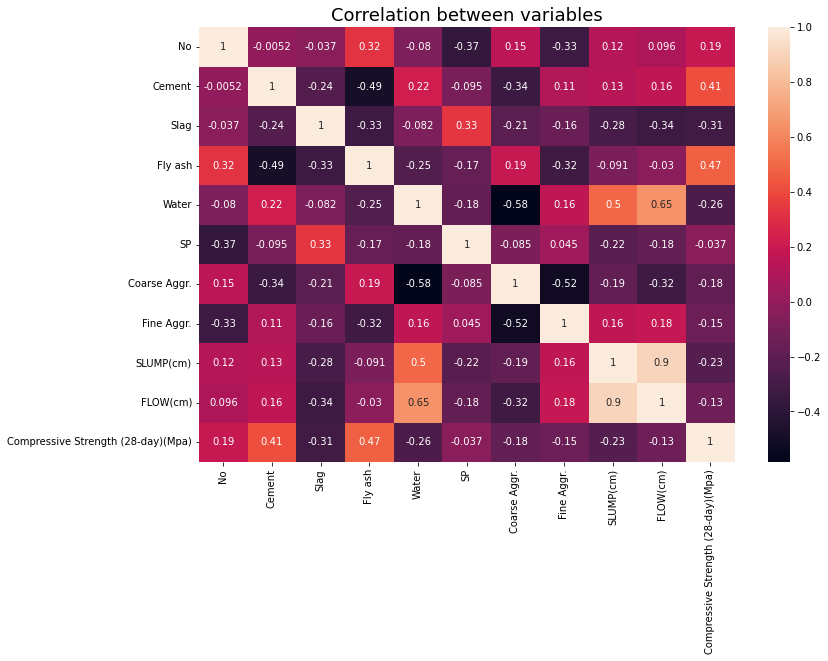

In [10]:
cor = train.corr()
plt.figure(figsize = (12,8))
plt.title("Correlation between variables", fontsize =18)
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.show()

## Data Transformation

As mentioned above, we'll remove the SP and No columns and the other two output columns. 

In [11]:
# extract target column, take in a dataset and return target column and other featues except target column
def extract(data):   
    y_train = data['Compressive Strength (28-day)(Mpa)']
    x_train = data.iloc[:, :-1]
    return y_train, x_train

y_train, x_train = extract(train)

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
# create a custom tranformer to remove columns
# drop_column set to True, returned data with removed columns ('FLOW(cm)','SLUMP(cm)','SP','No') 
# The ColumnsRemover class inherits from the sklearn.base classes (BaseEstimator, TransformerMixin). 
# This makes it compatible with scikit-learn’s Pipelines
class ColumnsRemover(BaseEstimator, TransformerMixin):
    def __init__(self, drop_column = True):
        # initialise drop_column
        self.drop_column = drop_column
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        # return the dataframe without the specified features
        if self.drop_column:
            return X.drop(['FLOW(cm)','SLUMP(cm)','SP','No'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# transformation pipeline to remove columns and perform feature scaling (used standardisation here)
pip = Pipeline([
    ('col', ColumnsRemover()),
    ('scaler', StandardScaler()),
])

In [64]:
x_train_pre = pip.fit_transform(x_train)

## Model training

We'll train three regressors (SVR, LinearRegression, SGDRegressor) and use them as the base estimators for the voting regressor. The voting regressor that fits the 3 base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

RMSE (root mean square error) is the differences between values predicted by a model or an estimator and the actual values. It it computed by calculating the difference between prediction and truth (residual) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean. The lower the RMSE, the better the prediction.

The parameter n_jobs=1 for LinearRegression means to use all processors.

The RMSE for SVR was more greater than 5 with the default rbf kernel on training set and this has significantly reduced by changing the kernel to linear. C is set to 2 to controls the trade-off between achieving a low prediction error on the training data and minimising the norm of the weights, when C is greater than 2 the decrease in RMSE was very samll. 

Few hyperparameters were tried for SGDRegressor,for example, the initial learning rate and the learning rate schedule. However, the default hyperparameters perform the best(gives a lower RMSE on training set). The random state is used for reproducible output across multiple function calls.

From RMSE calcualted below, we can see RMSE are simialr between the 4 regressors. LinearRegression performs the best with the lowest RMSE and it outperformed the voting regressor. From the scatterplot, it is clear that there are some predicted values that are shared between all four regressors. 

In [15]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor

lr = LinearRegression(n_jobs=-1)
svr = SVR(kernel='linear', C=2)
sgd = SGDRegressor(random_state=43)
vg = VotingRegressor([('lr', lr), ('svr', svr), ('sgd', sgd)], n_jobs=-1)

In [16]:
from sklearn.metrics import mean_squared_error

# regressors and prediction scores
regressors = [lr, svr, sgd, vg]
train_predictions= []

# fit model
for rg in regressors:
    rg.fit(x_train_pre, y_train)

# calcualte root mean square error
# takes 3 parameters, dataset, empty list to store the prediced values and target column
# print out the RMSE
def rmse(x, prediction, y_true):
    for c in regressors:
        pred_y = c.predict(x)
        prediction.append(pred_y)
        rmse = mean_squared_error(y_true, pred_y, squared=False)
        print(type(c).__name__ + " RMSE ", rmse)
        
rmse(x_train_pre, train_predictions, y_train)

LinearRegression RMSE  2.6353346773716697
SVR RMSE  2.694862954142195
SGDRegressor RMSE  2.6613486513549898
VotingRegressor RMSE  2.649278162908943


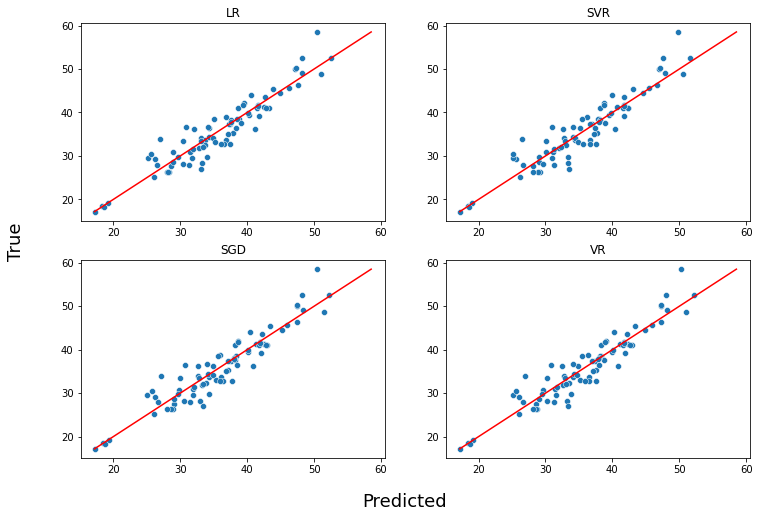

In [17]:
# multiple plot predicted values vs true values
def pred_plot(true,pred,row,col,title):
    g = sns.scatterplot(x=pred, y=true, ax=axe[row,col])
    g2 = sns.lineplot(x=true, y=true, ax=axe[row,col], color='red')
    g.set(ylabel=None, title=title)
    g2.set(xlabel=None, title=title)

figure, axe = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
title = ['LR','SVR','SGD', 'VR']

pred_plot(y_train,train_predictions[0],0,0,title[0])
pred_plot(y_train,train_predictions[1],0,1,title[1])
pred_plot(y_train,train_predictions[2],1,0,title[2])
pred_plot(y_train,train_predictions[3],1,1,title[3])

figure.text(0.5, 0.04, 'Predicted', ha='center',fontsize = 18)
figure.text(0.04, 0.5, 'True', va='center', rotation='vertical',fontsize = 18)

plt.show()

## Evaluate model on test set
Both Base estimators and voting regressors perform better on test set as comapred to training set. So there might be underfitting issue with the model.

Again, SVR has the highest RMSE (perform the worst) among all other regressors. SGDRegressor has the lowest RMSE and it's slightly lower than VotingRegressor (impacted by SVR). 

We can see some data points dispersed away from the line, if the predicted values = actual values, all the points should lie on the red line.

In [18]:
# extract column, remove columns and feature scaling
y_test,x_test = extract(test)
x_test_pre = pip.transform(x_test)

In [19]:
test_predictions = [] 
rmse(x_test_pre,test_predictions,y_test)

LinearRegression RMSE  2.0695569851034086
SVR RMSE  2.127218482091347
SGDRegressor RMSE  2.036329535046247
VotingRegressor RMSE  2.0596429522665844


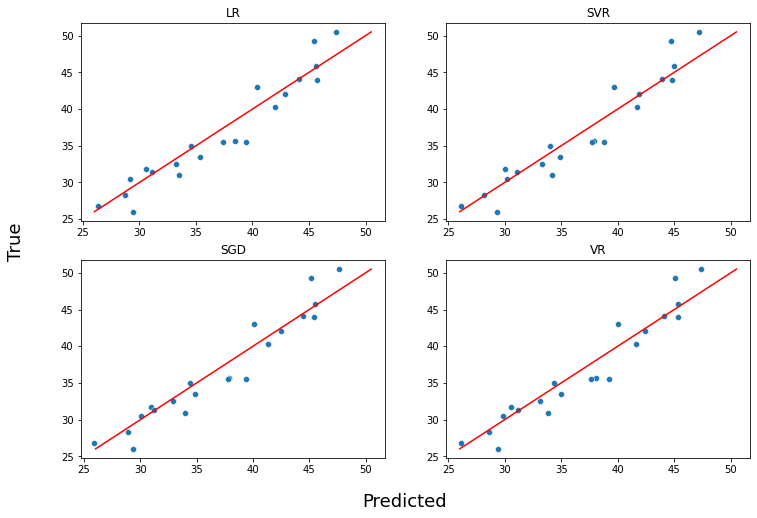

In [20]:
figure, axe = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))

pred_plot(y_test,test_predictions[0],0,0,title[0])
pred_plot(y_test,test_predictions[1],0,1,title[1])
pred_plot(y_test,test_predictions[2],1,0,title[2])
pred_plot(y_test,test_predictions[3],1,1,title[3])

figure.text(0.5, 0.04, 'Predicted', ha='center',fontsize = 18)
figure.text(0.04, 0.5, 'True', va='center', rotation='vertical',fontsize = 18)

plt.show()

# CITS5508-lab4-Project 2

Some common packages have already imported above, so let's load the data. 

## Load data 

Same as above, load the data from current directory.

In [21]:
# no header present, add column names
abalone = pd.read_csv('abalone.data', names=['Sex','Length(mm)', 'Diameter(mm)','Height(mm)', 
                                             'Whole weight(gram)','Shucked weight(gram)', 
                                             'Viscera weight(gram)','Shell weight(gram)','Rings'])

## Overview of the data
There were total 9 columns and 4177 entries in the data. One categorical column and the rest are numerical. 
Again the dataset is clean.

Units given for columns dont't seem right, adult abalone with length and height less than 1mm is not very reasonable and there are 2 rows with 0 height (could be empty shells - no meat). 

The distribution of legth and diameter are left-skewed, and weight variables are right skewed. While the variable Rings looks like a bit right skewed. 

In [22]:
abalone.head()

,Sex,Length(mm),Diameter(mm),Height(mm),Whole weight(gram),Shucked weight(gram),Viscera weight(gram),Shell weight(gram),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4177 non-null   object 
 1   Length(mm)            4177 non-null   float64
 2   Diameter(mm)          4177 non-null   float64
 3   Height(mm)            4177 non-null   float64
 4   Whole weight(gram)    4177 non-null   float64
 5   Shucked weight(gram)  4177 non-null   float64
 6   Viscera weight(gram)  4177 non-null   float64
 7   Shell weight(gram)    4177 non-null   float64
 8   Rings                 4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [24]:
abalone.describe()

,Length(mm),Diameter(mm),Height(mm),Whole weight(gram),Shucked weight(gram),Viscera weight(gram),Shell weight(gram),Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [25]:
(abalone["Height(mm)"] == 0).sum()

2

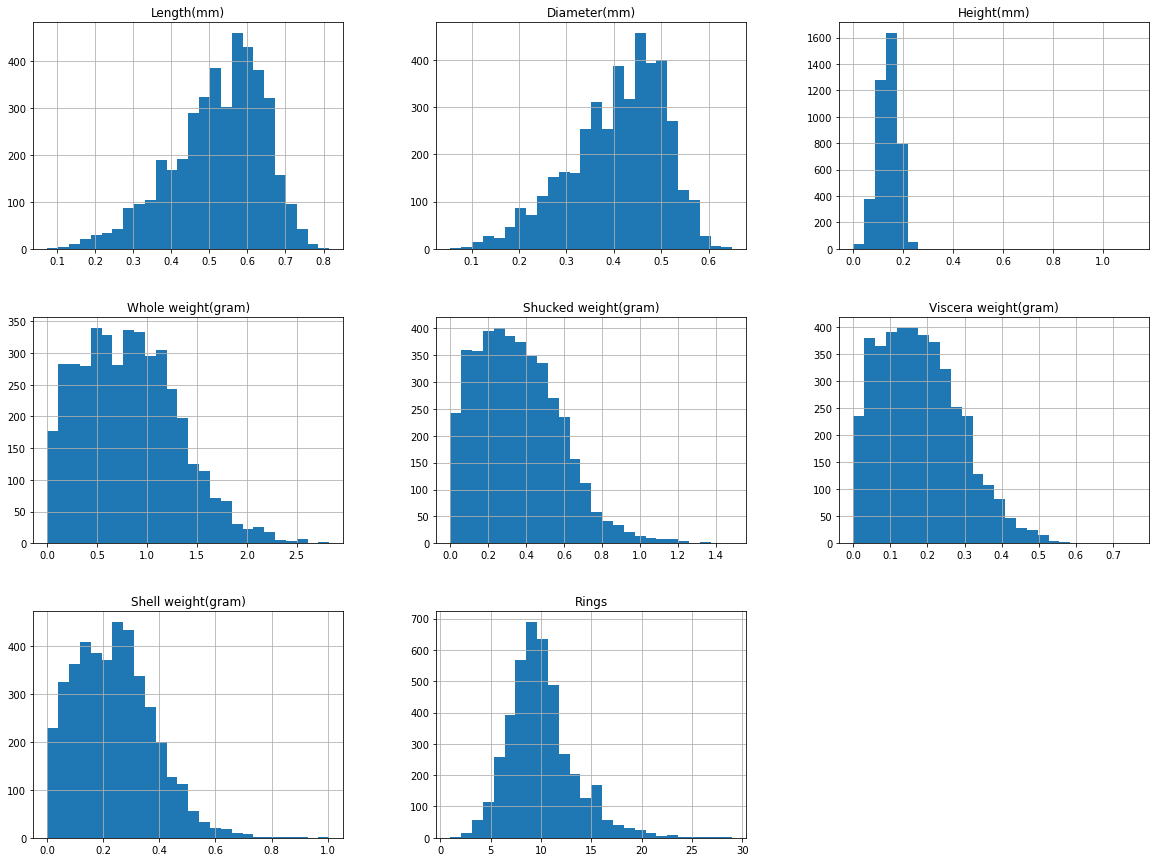

In [26]:
abalone.hist(bins=26, figsize=(20,15))
plt.show()

## Split data

Split the data to training ans testing set (85/15 random split)

In [27]:
abalone_train, abalone_test = train_test_split(abalone, test_size=0.15, random_state=52)

## Visualisation

More male abalone than female abalone. The infant label in the sex column may ovelap with Rings column (both tell us some information about the age). As Rings is the target column, it's probably better to drop this column as it discloses information about target column.

Also, we can see that the distribution of length, weight and height for both female and male are very simialr from the graphs below suggesting there is little differences between male and female abalone, so it's probably safe to drop the sex column.

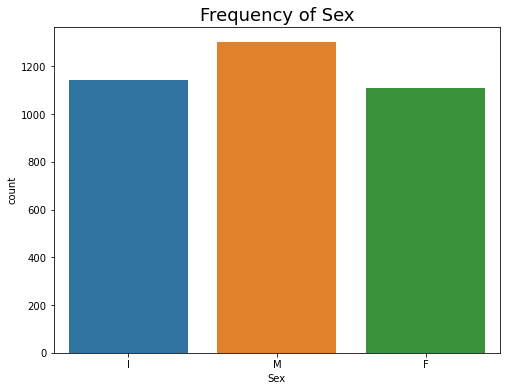

In [28]:
plt.figure(figsize = (8,6))
sns.countplot(x='Sex', data=abalone_train)
plt.title('Frequency of Sex', fontsize=18)
plt.show()

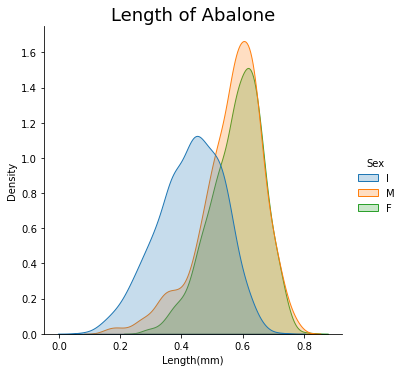

In [29]:
sns.displot(abalone_train, x="Length(mm)", hue="Sex",kind="kde", fill=True)
plt.title("Length of Abalone", fontsize=18)
plt.show()

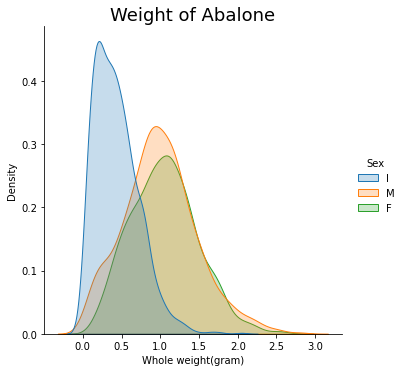

In [30]:
sns.displot(abalone_train, x="Whole weight(gram)", hue="Sex", kind="kde", fill=True)
plt.title("Weight of Abalone", fontsize=18)
plt.show()

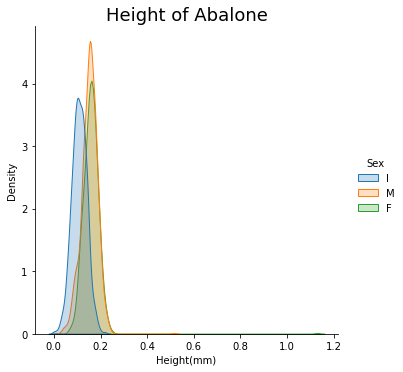

In [31]:
sns.displot(abalone_train, x="Height(mm)", hue="Sex",kind="kde", fill=True)
plt.title("Height of Abalone", fontsize=18)
plt.show()

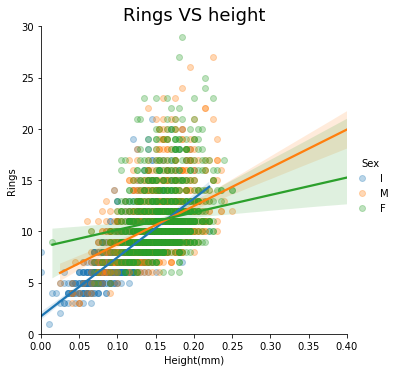

In [32]:
g = sns.lmplot(x="Height(mm)", y="Rings", hue="Sex", scatter_kws={'alpha':0.3}, data=abalone_train)
g.set(xlim=(0, 0.4), ylim=(0,30))
plt.title("Rings VS height", fontsize=18)
plt.show()

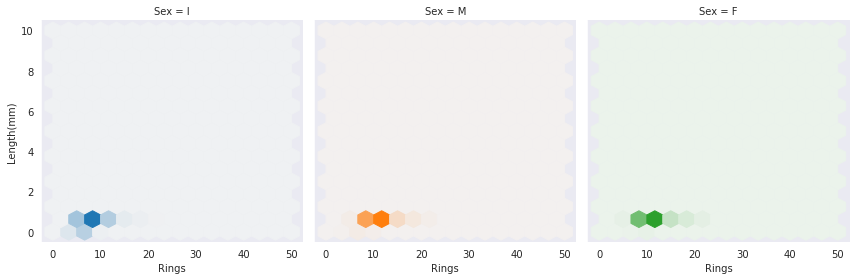

In [33]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(abalone_train, hue="Sex", col="Sex", height=4)

g.map(hexbin, "Rings", "Length(mm)", extent=[0, 50, 0, 10])

plt.show()

## Remove column
Remove the sex column and extract the target column Rings.

In [34]:
def rem_ex(data):
    target = data['Rings']
    features = data.drop(['Sex','Rings'],axis = 1)
    return target, features

yab_train, xab_train = rem_ex(abalone_train)
yab_test, xab_test = rem_ex(abalone_test)

## Model training

Random forest regressor fit 500 regression decision trees on sub-samples of the dataset and uses averaging to improve the performance.

Several hyperparameters were used regularise this model to limit overfitting issue: <br>
min_samples_leaf: minimum 50 of samples required to be at a leaf node.<br>
max_leaf_nodes: maximun 10 leaf nodes for the model. When min_samples_leaf=50, and the RMSE didn't change when max_leaf_nodes greater than 10<br>
max_samples: 500 samples to draw from the datset to train each base estimator (greater the number of samples used for each base estimator, the lower the RMSE). Float number like 0.5, 0.8 were tried, but it was very slow to run for bagging regressor, and samples greater than 500 didn't decrease the RMSE much. <br>
min_impurity_decrease: split of node only if this split induces a decrease of the impurity greater than or equal to 0.1. <br>
Rest of the parameters leave as default, e.g., bootstrap=True -> bootstrap samples are used when building decision trees. <br>


In [35]:
from sklearn.ensemble import RandomForestRegressor
rfre = RandomForestRegressor(n_estimators=500, max_leaf_nodes=10, min_samples_leaf=50, max_samples=500, min_impurity_decrease = 0.1,
                             bootstrap= True,random_state=52, n_jobs=-1)

In [36]:
rf_train_pred = rfre.fit(xab_train,yab_train).predict(xab_train)
rf_train_pred = np.round(rf_train_pred,0)
print("RMSE on training set:",mean_squared_error(yab_train, rf_train_pred, squared=False))

RMSE on training set: 2.3881161176855064


In [37]:
rf_test_pred = rfre.predict(xab_test)
rf_test_pred = np.round(rf_test_pred,0)
print("RMSE on test set:",mean_squared_error(yab_test, rf_test_pred,squared=False))

RMSE on test set: 2.414073568922921


### Feature Importance

Feature importance measures the relative importance of each feature. It is calculated as the decrease in node MSE weighted by the number of training instances associated with that node (weighted average of decrease in mse).

Look at the feature importance of variables and only keep variables with an importance value greater than 0.05, three variables retained (height, shucked weight and shell weight) and rest of them discarded. The total feature importance of retained variable is 0.968.

In [38]:
# print out feature importance values for all varibales
for name, score in zip(xab_train.columns, rfre.feature_importances_):
    print(name, score)

Length(mm) 0.0023061268949909606
Diameter(mm) 0.012259516648794476
Height(mm) 0.06630972076251836
Whole weight(gram) 0.004802082126201758
Shucked weight(gram) 0.0694979984682019
Viscera weight(gram) 0.012663471366374236
Shell weight(gram) 0.8321610837329183


In [39]:
from sklearn.feature_selection import SelectFromModel
# use a prefit model (rfre)
selector = SelectFromModel(estimator=rfre, threshold=0.05, prefit=True)
reduced_x_train = selector.transform(xab_train)

In [40]:
features = xab_train.columns[selector.get_support()]

In [41]:
print("Features retained:",list(features))
print("Features removed:",list(set(xab_train.columns).difference(features)))

Features retained: ['Height(mm)', 'Shucked weight(gram)', 'Shell weight(gram)']
Features removed: ['Length(mm)', 'Viscera weight(gram)', 'Diameter(mm)', 'Whole weight(gram)']


In [42]:
print("Feature dimensions(Reduced):", "Number of instances:" ,reduced_x_train.shape[0]," Number of features:", reduced_x_train.shape[1] )
print("Feature dimensions(Full):", "Number of instances:", xab_train.shape[0]," Number of features:" ,xab_train.shape[1])

Feature dimensions(Reduced): Number of instances: 3550  Number of features: 3
Feature dimensions(Full): Number of instances: 3550  Number of features: 7


In [43]:
print("Total feature importance value of variables retained:", 
      rfre.feature_importances_[rfre.feature_importances_ > 0.05].sum())

Total feature importance value of variables retained: 0.9679688029636386


### Reduced-dimensional random-forest

Train a new random forest regressor on the reduced dataset.The hyperparameters used for this model were exactly the same the random forest regressor above, see above for explanation. 

In [44]:
rfre_reduced = RandomForestRegressor(n_estimators=500, max_leaf_nodes=10, min_samples_leaf=50, max_samples=500, 
                                     min_impurity_decrease = 0.1, bootstrap= True,random_state=52, n_jobs=-1)
reduced_rfre_pred = rfre_reduced.fit(reduced_x_train,yab_train).predict(reduced_x_train)
reduced_rfre_pred = np.round(reduced_rfre_pred,0)
print("reduced-dimension training RMSE:", np.sqrt(mean_squared_error(yab_train, reduced_rfre_pred)))

reduced-dimension training RMSE: 2.3887058196767863


In [45]:
print("Total feature importance value of variables:", 
      sum(rfre_reduced.feature_importances_))

Total feature importance value of variables: 1.0


In [46]:
reduced_x_test = selector.transform(xab_test)

In [47]:
reduced_rfre_pred_test = rfre_reduced.predict(reduced_x_test)
reduced_rfre_pred_test = np.round(reduced_rfre_pred_test,0)
print("reduced-dimension test RMSE:", np.sqrt(mean_squared_error(yab_test, reduced_rfre_pred_test)))

reduced-dimension test RMSE: 2.419023489168372


### Comapre two Random Forest regressors

There is only slight difference in RMSE between the two regressors (2.414 and 2.419). The RMSE for reduced random forest is slight higher than the random forest trained on the full dataset.

The residual density plot for both regressors overlap with each other (almost identical).
The average residual for each ring almost mostly overlap for both models, slight differences may observed if look very carefully (ring 6,7,8 with higher mean residuals for first regressor than the reduced model).

In [48]:
# residuals between predicted values and actual values
first_rf_residuals = yab_test - rf_test_pred
sec_rf_residuals = yab_test - reduced_rfre_pred_test

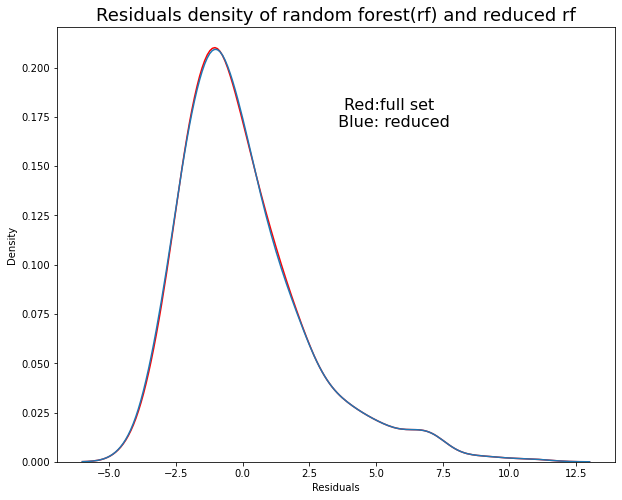

In [49]:
plt.figure(figsize = (10,8))
ax = sns.kdeplot(first_rf_residuals, color = 'red')
sns.kdeplot(sec_rf_residuals, ax=ax)
plt.title("Residuals density of random forest(rf) and reduced rf", size=18)
ax.text(0.6, 0.8, 'Red:full set \n Blue: reduced', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, size=16)
plt.xlabel('Residuals')
plt.show()

In [50]:
# compute mean residual for ring
def average_error(y_true, residuals):
    res_df = pd.DataFrame( {'y_true':y_true,'residuals': residuals})
    mean_res = res_df.groupby('y_true', as_index=False)['residuals'].mean()
    mean_res['y_true'] = mean_res['y_true'].apply(str)
    return res_df, mean_res

first_res_df, first_mean_res = average_error(yab_test, first_rf_residuals)
res_df, mean_res = average_error(yab_test, sec_rf_residuals)

In [51]:
# plot two barplot overlay on each other 
def compare_mean_res(data1, data2, title):
    plt.figure(figsize = (10,8))
    sns.barplot(x="y_true", y="residuals", data=data1, color='lime', alpha=1)
    sns.barplot(x="y_true", y="residuals", data=data2, color='green', alpha = 0.5)
    plt.xlabel("Rings")
    plt.ylabel("Residuals")
    plt.title(title, fontsize=18)

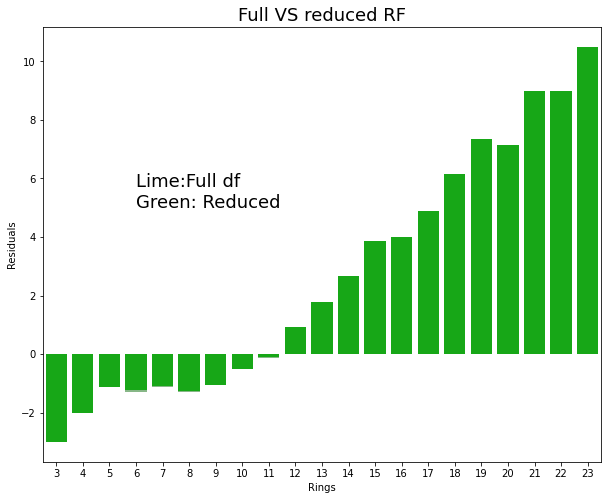

In [52]:
compare_mean_res(first_mean_res,mean_res,'Full VS reduced RF')
plt.text(3,5, 'Lime:Full df \nGreen: Reduced', size=18)
plt.show()

The average residuals for rings greater than 10 tend to increase with the number of rings. if we take absolute average residual, we would see the barplot below looks like a shape similar to a tick mark. 

When we look at the frequency of the ring, the frequency of ring gradually increases untill ring is equal to 9 and then decreases and this inverse proportional to the average residule values which means the number of samples for each ring number in the dataset affect the prediction error. The greater the numebr of samples, the lower the error. 

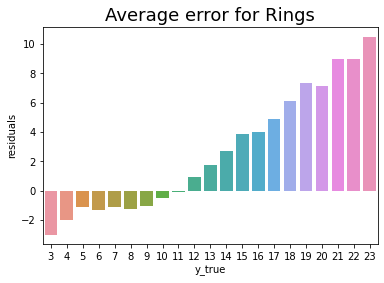

In [53]:
sns.barplot(x='y_true', y='residuals', data=mean_res)
plt.title("Average error for Rings",fontsize=18)
plt.show()

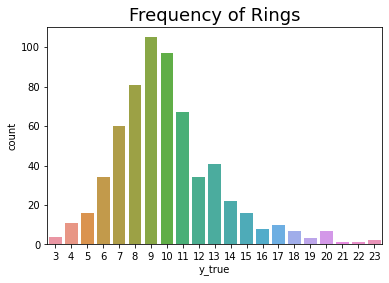

In [54]:
sns.countplot(x='y_true', data=res_df)
plt.title("Frequency of Rings",fontsize=18)
plt.show()

## Bagging

Fits 500 SVR regressors, each on random subsets of the dataset (same as random forest, 500 samples) and then averaging their individual predictions to form a final prediction.

The RMSE for this model on test set is 2.23.

When the ring is greater than 7, we can see that most predicted values were much less than the actual values ( more points above the blue line than points below the line). 

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import make_pipeline

# base estimator
# perform scaling first since it's svm
# tried all kernels and rbf perform the best, scale perfrom better than auto for gamma
# when C gets large, the RMSE decreases, however when C larger than 5, the decrease in RMSE is minor.  
bagging_svr = make_pipeline(StandardScaler(), SVR(kernel="rbf", gamma="scale", C=5))

# same common parameters as random forest
bagging = BaggingRegressor(base_estimator=bagging_svr,
                           n_estimators=500, max_samples=500, n_jobs=-1,
                           random_state=52)

In [56]:
bagging.fit(xab_train, yab_train)
bagging_train_pred = bagging.predict(xab_train)
bagging_train_pred = np.round(bagging_train_pred,0)
print("Bagging training RMSE:", mean_squared_error(yab_train, bagging_train_pred, squared=False))

Bagging training RMSE: 2.1927537513557027


In [57]:
bagging_test_pred = bagging.predict(xab_test)
bagging_test_pred = np.round(bagging_test_pred,0)
print("Bagging test RMSE:", mean_squared_error(yab_test, bagging_test_pred,squared=False))

Bagging test RMSE: 2.2299970319174074


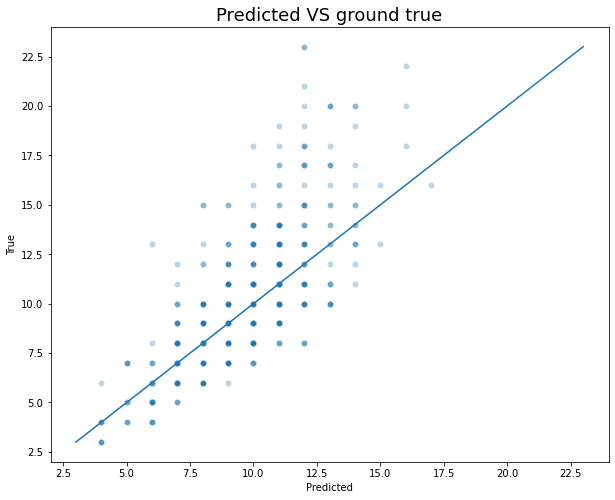

In [58]:
# predicted vlaue vs true value
plt.figure(figsize = (10,8))
sns.scatterplot(x=bagging_test_pred, y=yab_test, alpha=0.3)
sns.lineplot(x=yab_test, y=yab_test)
plt.title('Predicted VS ground true', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

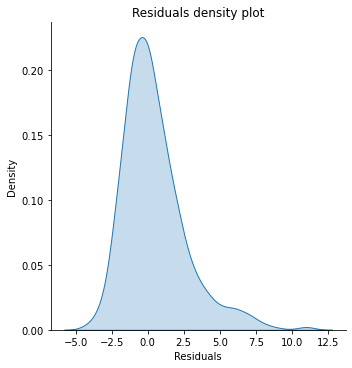

In [59]:
# residual density plot
bagging_residual = yab_test - bagging_test_pred
sns.displot(bagging_residual, kind="kde", fill=True)
plt.xlabel("Residuals")
plt.title("Residuals density plot")
plt.show()

## Comapre bagging and random forest

Bagging perform better than random forest, with slightly lower RMSE (2.23 vs 2.414).


When looking at the average residual plot for both bagging and random forest, the bagging regressor perfrom better than random forest for most of the rings except ring 11,12,13,23 which the random forest regressor perform better than bagging and same average residual for ring 14 and 21.

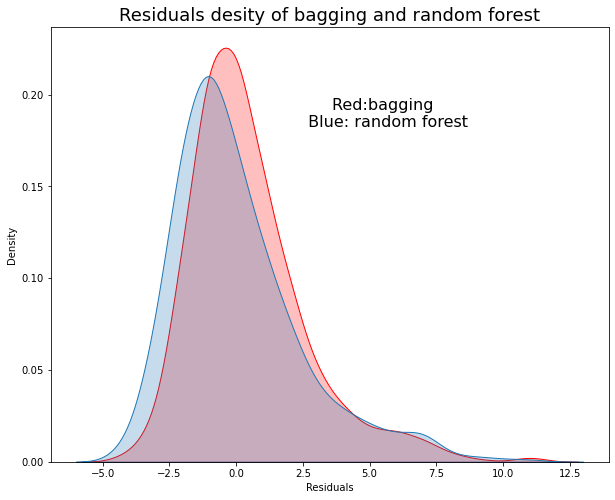

In [60]:
# bagging vs rf average residual plot
plt.figure(figsize = (10,8))
ax = sns.kdeplot(bagging_residual, fill=True, color = 'red')
sns.kdeplot(first_rf_residuals, fill=True, ax=ax)
plt.title("Residuals desity of bagging and random forest", size=18)
ax.text(0.6, 0.8, 'Red:bagging \n Blue: random forest', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, size=16)
plt.xlabel('Residuals')
plt.show()

In [61]:
baging_res_df, bagging_mean_res = average_error(yab_test, bagging_residual)

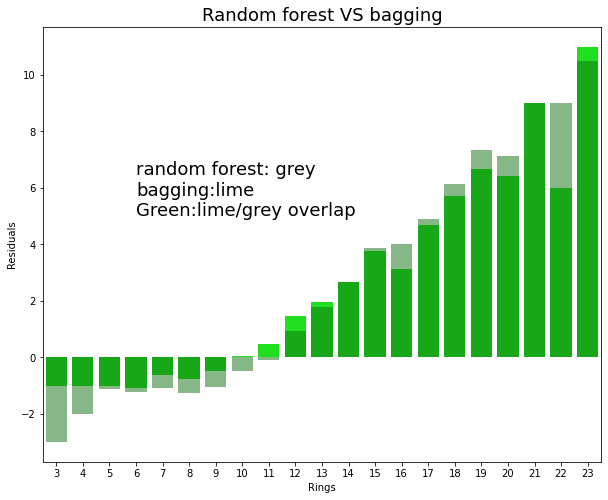

In [62]:
compare_mean_res(bagging_mean_res,first_mean_res,'Random forest VS bagging')
plt.text(3,5, 'random forest: grey \nbagging:lime\nGreen:lime/grey overlap',size=18)
plt.show()